# Lab 1: Machine learning basics and linear regression

## Machine learning

Every single day we generate over 2.5 quintillion bytes of data in all possible forms such as photos, videos or social media posts. To make sense of these amounts of data we rely on complicated algorithms that can efficiently store and analyze it. For some types of data it is however impossible to design a fixed algorithm that performs a certain task. Recognizing the content of an image using only the raw pixel values for example is a very complicated problem for which it is almost impossible to define a fixed sequence of steps that performs this task. This is were machine learning comes in. **Machine learning (ML)** is the scientific field that make computers learn from data. Instead of designing an algorithm that directly performs a certain task, we design algorithms that learn to perform this task from example data points. Machine learning is thus complimentary to traditional algorithms, there is no point in using a machine learning technique if an (efficient) algorithm is available for a certain task (e.g. sorting). Machine learning really shines when we can not easily describe exactly *how* something should be done but instead we can give many examples of our desired functionality. It is for example hard to come up with a set of rules that classifies an e-mail as spam or not but not to collect hundreds of examples of spam and normal e-mail.

Machine learning is a subfield of **Artificial Intelligence (AI)** which comprises much broader techniques to build machines that demonstrate some kind of intelligence. Techniques such as planning algorithms and symbolic reasoning are part of AI but not of ML. Machine learning has many intersections with other fields such as **robotics**, **signal processing**, **statistics**, **optimization**, **data mining** (extracting useful data from large databases) or **pattern recognition** (automatic discovery of regularities in data ).

Machine learning practitioners use statistical **models** that capture information from a given set of **training data** (**train set**). The hope is that the models learn the underlying properties without being overly sensitive to noise in the data. After training, the models are then used to make predictions about new, unseen data (**test set**). This stage is called **inference** and a good model should be able to **generalize** to data that is slightly different than the data that was seen during training. Machine learning models will almost never generalize perfectly in the way we hope they will, the goal is thus to reach an acceptable score on some kind of **performance metric**.

## Types of machine learning problems

There are many different types of machine learning and machine learning models and depending on the task, the data or on prior knowledge about the problem, some models are better suited than others. 
- **Supervised learning** techniques require a labeled training set, i.e. a collection of examples (X), each annotated with a **label** (Y). In the case of image recognition this would be the type of object that is seen in the picture or in the case of spam detection this would be a boolean flag, indicating whether the e-mail is spam or not. Both of these examples require the model to predict a class that the input belongs to (cat or dog, spam or not spam). These types of problems where we are predicting a class membership are called **classification**. If we instead are tasked with predicting a real number (e.g. what will the stock price be tomorrow, based on the current market condition), then we are dealing with a **regression** problem.

- **Unsupervised learning** techniques do not need a labeled training set and consequently will not learn a mapping to some predefined output. Instead, unsupervised learning algorithms try to find regularities in the input space that are a sign of some underlying structure to the data. Examples of unsupervised learning are **density estimation** (finding out what inputs occur more often than others), **clustering** (grouping similar data points into **clusters**) and **dimensionality reduction** (compressing the information into a lower dimensional representation that removes redundant parameters).

- **Reinforcement learning** deals with problems where the model needs to interact directly with the environment. Examples could be a robot navigating within a building or a game AI playing against a human player in a video game. The task of the model (**agent**) is to come up with a sequence of actions (**policy**) that it needs to execute within the environment to end up in a desired state. The agent receives feedback (**reward**) after some actions and needs to update its policy to favor actions that result in higher rewards. The difficulty of these types of problems is that the reward is often **sparse** i.e. the agent only receives a reward at the end of a sequence (e.g. when the game is over). It then needs to figure out exactly which combination of actions have resulted in this reward and how this can be improved in the future.

## The ML workflow

![](images/workflow.png),<br/>Source: https://towardsdatascience.com/workflow-of-a-machine-learning-project-ec1dba419b94

The development of a machine learning model typically looks like the figure above. It all starts with collecting a dataset. This dataset is then split into a **Test set** and a **Train set**. The model is trained on the train set and after training, its generalization performance is evaluated on the hold-out test set. This is repeated until a good model configuration is found. The model is then released into production to make prediction for real users. Depending on the data and the problem there will be additional steps such as **Data preprocessing**,  **Data cleaning**, **Feature extraction**, **Feature selection**, ...

## The task

In this session we will predict the price of a house based on information such as the location and the number of rooms. This dataset (Boston Housing Dataset) is a well known public dataset that is often used in introductory machine learning courses. 
<div style="float:left">
        <img src="images/forsale.jpg" width="550" />
</div>

We will now build the the entire machine learning pipeline with this dataset and a very simple regression model: Linear regression. In all sessions we will intensively use different typical python data science tools such as:
- numpy
- pandas
- matplotlib (seaborn)
- sklearn

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 20,16

%matplotlib inline

## The data

Because this is such a common dataset, the sklearn library has a utility method to load it.

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

<font color='red'>Task: explore the dataset object</font>

In [3]:
print(boston_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [4]:
print(boston_dataset.keys())
print(boston_dataset["data"].shape)
print(boston_dataset["data"].dtype)
print(boston_dataset["target"].shape)
print(boston_dataset["target"].dtype)
print(boston_dataset["feature_names"])
print(boston_dataset["DESCR"])

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
float64
(506,)
float64
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighte

The following observations can be made:
- There are 506 datapoints (houses)
- For each of these we have 13 **features**. These are the characteristics that we can use to make our predictions. All the features are floating point numbers.
- For each of these we have a single number. This is our target, the **ground-truth**.

## Exploratory Data Analysis (EDA)

<font color='red'>Task: Transform this into a pandas dataframe for easier processing. Add the target as an additional column. Use the head() and describe() methods to display some information about the data.</font>

In [5]:
import pandas as pd
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['TARGET'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<font color='red'>Task: Visualize the distribution of the target variable</font>

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

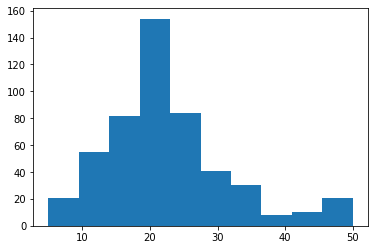

In [7]:
plt.hist(boston["TARGET"])

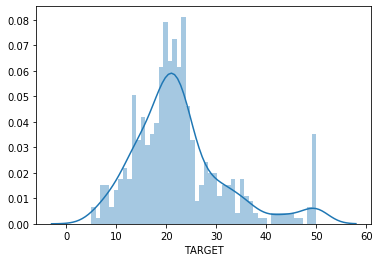

In [8]:
sns.distplot(boston['TARGET'], bins=50)

<font color='red'>Task: Show the correlation matrix between the different features</font>

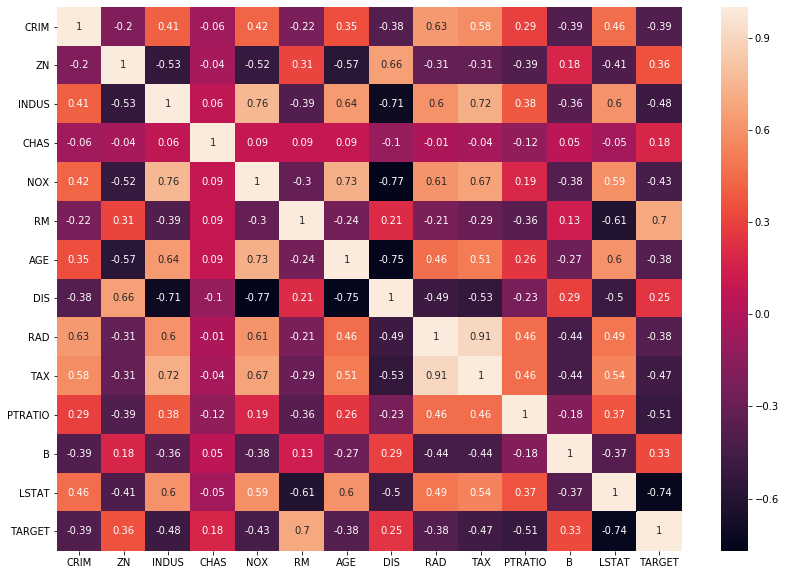

In [9]:
correlation_matrix = boston.corr().round(2)
plt.figure(figsize=(14,10))
sns.heatmap(data=correlation_matrix, annot=True)

<font color='red'>Task: What is the mathematical meaning of the number in each cell. What are the most interesting and least interesting features ? Do these make sense ?</font>

- Each cell in this matrix shows the correlation between two features.
- By default, Pandas uses the **Pearson product-moment correlation coefficient** although it can be configured to use other coefficients as well.
- The values of the correlation coefficient can range from -1 to +1. The closer it is to +1 or -1, the more closely the two variables are related. 
- A value of 1 implies that a linear equation describes the relationship between X and Y perfectly, with all data points lying on a line for which Y increases as X increases. A value of -1 implies that all data points lie on a line for which Y decreases as X increases. A value of 0 implies that there is no linear correlation between the variables.

By looking at the "Target" column, we can see which features are correlated with our target value. "RM" for example has a relatively high correlation with the target. It is a positive value, indicating that houses with larger numbers of rooms typically have a higher price. On the contrary, "LSTAT" has a negative correlation since it is the percentage of homeowners in the neighborhood considered "lower class" (working poor).

<font color='red'>Task: Plot two features (not the target) as a function of each other. Do this for two features with a very high  (positive) correlation, a very low (negative) correlation and a correlation around 0.</font>

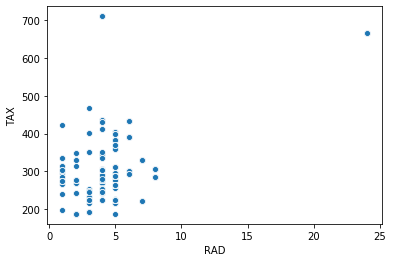

In [10]:
sns.scatterplot(x=boston["RAD"], y=boston["TAX"])

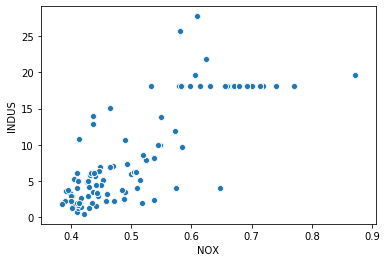

In [11]:
sns.scatterplot(x=boston["NOX"], y=boston["INDUS"])

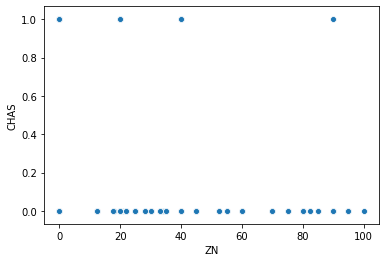

In [12]:
sns.scatterplot(x=boston["ZN"], y=boston["CHAS"])

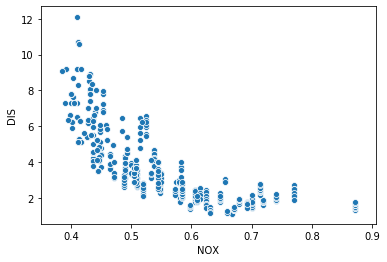

In [13]:
sns.scatterplot(x=boston["NOX"], y=boston["DIS"])

<font color='red'>Task: Plot the target as a function of each feature.</font>

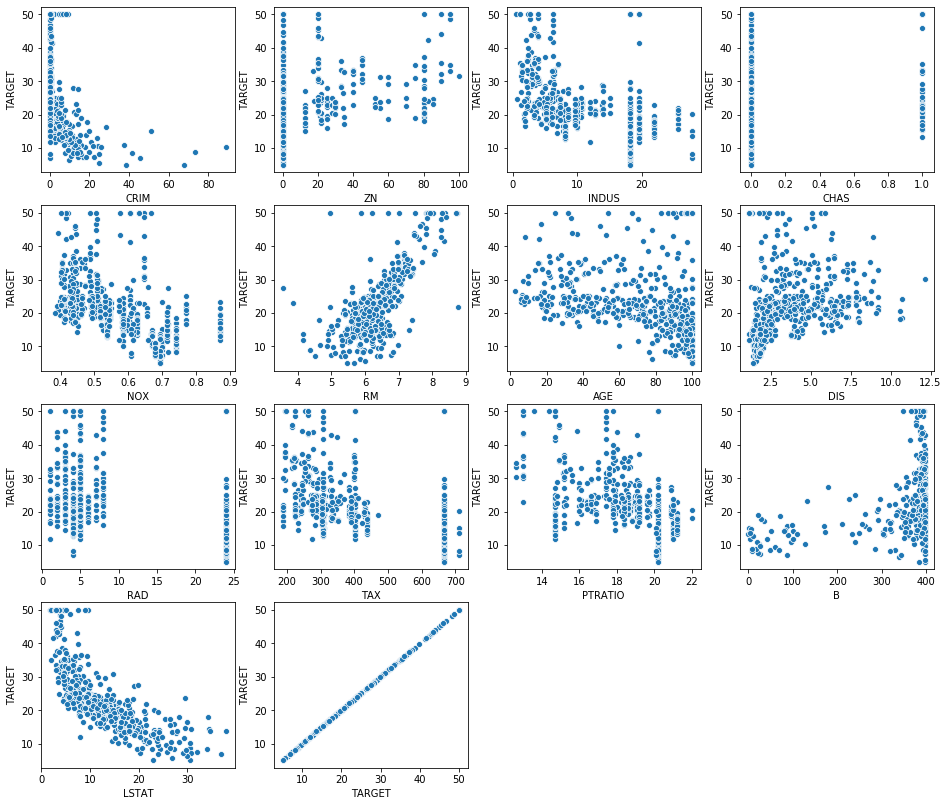

In [14]:
plt.figure(figsize=(16,14))
for i, k in enumerate(boston.keys()):
    plt.subplot(4,4,1+i)
    sns.scatterplot(x=boston[k], y=boston["TARGET"])

<font color='red'>Task: What are the most interesting features ?</font>

LSTAT and RM seem to be good predictors for the target.

## Train - Test - Split

As explained in the introduction, the goal of machine learning is to build models on train data that are able to make predictions on unseen test data. So we split our data into a **trainset** (80%) and a **test set** (20%). Based on the correlation matrix and the scatterplots, we select "LSTAT" and "RM" as the initial features of our model.

In [15]:
from sklearn.model_selection import train_test_split

X = pd.concat((boston['LSTAT'], boston['RM']), axis=1)
Y = boston['TARGET']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(404, 2)
(404,)
(102, 2)
(102,)


## Linear regression

Linear regression assumes that we can model the target using a **linear** combination of the input features. This means that we can approximate the target using a **weighted sum** of the input features.

We can write the model as $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n + \epsilon = \beta_0 + \sum_{i=1}^{n} \beta_i X_i + \epsilon$

where :
- $Y$ is our target value
- $\beta_i$ are the **parameters** of the model that we need to find
- $X_i$ are the values of our input features
- $\epsilon$ is an noise term that we are unable to model.

In the simplest case with only one input feature, this reduces to $Y = \beta_0 + \beta_1 X_1 + \epsilon$ or $Y = ax + b$, the equation of a straight line with slope $a$ and intercept $b$. $b$ is often called a **bias**. For convenience we incorporate this bias in the weight matrix $\beta$ and extend the input features $X_i$ with a constant feature with value one.

All that linear regression algorithms do is fit a straight line (**trend line**) through the datapoints and once we know the equation of the line, we can make predictions for every possible feature combination. If we have two input features we instead try to fit a plane in 3D space.

<div>
    <div style="float:left">
        <img src="images/linear_regression.png" width="550" />
        <br/>Source: https://en.wikipedia.org/wiki/Linear_regression  
    </div>
    <div style="float:left, margin-left:600px">
        <img src="images/3d.jpg" width="600"/>
        <br/>Source:https://www.dataquest.io/blog/statistical-learning-for-predictive-modeling-r/
    </div>
</div>

It is convenient to write this in matrix notation as $y = X\beta + \epsilon$

where:

- $y$ is the set of target values (n points)
- $X$ is the set of features values (p values for each of the n points)
- $\beta$ are the parameters of the model, (p weights, one for each input feature)
- $\epsilon$ is the noise for each datapoint (n values)



$\begin{pmatrix}
y_1\\
\vdots\\
y_n
\end{pmatrix} = 
\begin{pmatrix}
1 & x_{11} & ... & x_{1p}\\
1 & x_{21} & ... & x_{2p}\\
\vdots & \vdots & \ddots & \vdots\\
1 & x_{n1} & ... & x_{np}
\end{pmatrix} *
\begin{pmatrix}
\beta_0\\
\beta_1\\
\vdots\\
\beta_p
\end{pmatrix}
+
\begin{pmatrix}
\epsilon_1\\
\epsilon_2\\
\vdots\\
\epsilon_n
\end{pmatrix}
$

## Training the model
We have now defined our problem, our dataset and our model. The next step is to use the model to capture information about the training data. This process is called **training** the model. It usually involves an iterative process that changes the **parameters** of the model. This is an **optimization** problem: find the values $\beta$ that make the line go through the data as best as possible.

<div>
    <img src="images/training.gif" width="550" />
    <br/>Source: https://towardsdatascience.com/linear-regression-the-easier-way-6f941aa471ea
</div>


Each optimization problem needs a **loss function** to minimize. This loss function measures the **error** between our prediction and the actual target value. In this case we use **sum of squares** as our loss function: $\sum_{i=1}^{n} (y - X\beta)^2 = \sum_{i=1}^{n} \epsilon_i^2 $

Since $\epsilon$ is a vector, we can write $\epsilon^2$ as $\epsilon^\intercal\epsilon$ where $\epsilon^\intercal$ indicates the **transpose** of $\epsilon$.

$\epsilon^\intercal\epsilon = \begin{pmatrix}\epsilon_1 & \dots & \epsilon_n \end{pmatrix} * \begin{pmatrix}
\epsilon_1\\
\vdots\\
\epsilon_n
\end{pmatrix} = \begin{pmatrix}\epsilon_0^2 & \epsilon_0^2 & \dots & \epsilon_n^2\end{pmatrix}$

Substituting $\epsilon =  y - X\beta$ this results in:

$\begin{align*}
\epsilon^\intercal\epsilon &= (y - X\beta)^\intercal(y - X\beta)\\
&= (y^\intercal - X^\intercal\beta^\intercal)(y-X\beta) \\
&= y^\intercal y - \beta^\intercal X^\intercal y - y^\intercal X \beta + \beta^\intercal X^\intercal X\beta \\
&= y^\intercal y - 2 \beta^\intercal X^\intercal y + \beta^\intercal X^\intercal X\beta
\end{align*}$
<br/>
Here we made use of the fact that $\beta^\intercal X^\intercal y = (\beta^\intercal X^\intercal y)^\intercal = y^\intercal X \beta$ as they both represent the same scalar value and the transpose of a scalar is the value itself.

To find the $\beta$ that minimizes this, we take the **partial derivative** of this function to the elements of $\beta$. Finding the minimum is then equivalent to putting the partial derivatives to zero.

<font color='red'>Task: What is the meaning of the partial derivative in this context ?</font>

- The partial derivative of a function with respect to a parameter is a metric of the rate of change of the function along this dimension.
- If the derivative w.r.t. this parameter is non-zero, we can adjust this parameter to reduce the loss.
- We find the parameter combinations that result in zero partial derivatives.
- A zero derivative occurs in case of a maximum or minimum. By calculating the second order derivative, we can proof that this is indeed a minimum.
- This only works because there is a single **global** minimum in our loss function.

$\frac{\partial \epsilon^\intercal \epsilon}{\partial \beta} = -2 X^\intercal y + 2X^\intercal X \beta = 0$ (see https://medium.com/analytics-vidhya/multivariate-linear-regression-from-scratch-using-ols-ordinary-least-square-estimator-859646708cd6 for the derivation of this partial derivative).
<br/>
We now have an expression for $\beta$ that gives us the smallest error:

$ \beta = (X^\intercal X)^{-1} X^\intercal y $

<font color='red'>Task: Calculate the optimal $\beta$ from the datapoints in X_train and Y_train</font>

In [16]:
X = X_train.values
X = np.hstack([np.ones((len(X), 1)), X])
y = Y_train.values

Xt = X.transpose()
result = np.dot(Xt, X)
result =  np.linalg.inv(result)
result = np.dot(result, Xt)
result = np.dot(result, y)

print(result)

[-6.22601692 -0.56197571  5.69920247]


<font color='red'>Task: What do each of these $\beta$ values mean ? What does the sign mean ? What does the absolute value mean ? Do they make sense ?</font>

- These are the coefficients of our linear model.
- The prediction of our model is the weighted sum of our input values with these weights.
- The first value is the constant **bias**.
- The second two are the weights for the LSTAT and RM features.
- The sign indicates the relationship between the input feature and the target. If LSTAT increases, the target decreases. If RM increases, the target also increases. 
- The absolute value does not necessarily mean anything because it is sensitive to the scale of the input features. We can only compare two features if they have the same scale. See the remark about input normalization at the end of this document.

<font color='red'>Task: Implement a function *predict* that predicts the result for a new point.</font>

In [17]:
def predict(points):
    # points is a numpy array with three values: The constant 1, the observation for LSTAT and for RM
    return np.dot(points, result)

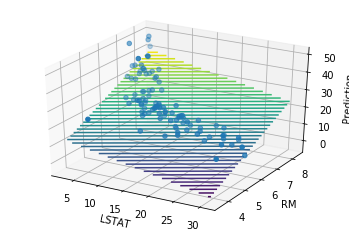

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')

x = np.linspace(X_test["LSTAT"].min(), X_test["LSTAT"].max(), 30)
y = np.linspace(X_test["RM"].min(), X_test["RM"].max(), 30)
X, Y = np.meshgrid(x, y)


predictions = np.array([predict([b, x,y]) for b,x,y in zip(np.ones(len(np.ravel(X))), np.ravel(X), np.ravel(Y))])
predictions = predictions.reshape(X.shape)

ax.contour3D(X, Y, predictions, 50)

ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_zlabel('Prediction')

ax.scatter3D(X_test["LSTAT"], X_test["RM"], Y_test)

<font color='red'>Task: What would this plane look like if we forgot to add the bias ?</font>

The plane is described by $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2$. If we do not add the bias, the plane will have to go through (0,0,0).

## Measure the performance of the model
We now have a trained model for our data and we can visually see that it fits the data well. How can we quantify this into a single number in order to compare different methods ? For this we will use the **R-squared** metric. This is a statistical measure between 0 and 1 which calculates how similar a regression line is to the data it is fitted to. If it's a 1, the model is able to predict all the variance in the data, if it's a 0, the model predicts none of the variance. $R^2$ is often called the **coefficient of determination**. It is the proportion of the variance in the dependent variable that is predictable from the independent variable(s)

$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$

With 
- $SS_{res}$: The sum of squares of residuals. $\sum_{i=1}^{n} (y_i - x_i\beta)^2 = \sum_{i=1}^{n} \epsilon_i^2 $
- $SS_{tot}$: The total sum of squares (proportional to the variance of the data): $\sum_{i=1}^{n} (y_i - \bar{y})^2$  where $\bar{y}$ indicates the mean of the target.

<font color='red'>Task: Calculate the $R^2$ score for our model on the test set</font>

In [19]:
x = X_test
y = Y_test

ss_tot = np.sum((y - y.mean()) ** 2)
x = np.hstack([np.ones((len(x), 1)), x])
pred = np.dot(x, result)

ss_res = np.sum((pred-y)**2)

print(1-ss_res/ss_tot)

0.592480253344337


![](images/linear.png)<br/> XKCD Linear Regression: https://xkcd.com/1725/

$R^2$ is a relative **measure of fit**, it does not tell us anything about how close the predictions are to the real targets. To do this, we can instead use the **Root Mean Squared Error (RMSE)**. RMSE indicates how much our predication deviate from the target on average.

$RMSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - x_i\beta)^2 = \frac{1}{n} \sum_{i=1}^{n} \epsilon_i^2$

<font color='red'>Task: Calculate the RMSE score for our model on the test set</font>

In [20]:
x = X_test
y = Y_test

x = np.hstack([np.ones((len(x), 1)), x])
pred = np.dot(x, result)

rmse = np.sqrt(np.mean((pred-y)**2))

print(rmse)

6.278893389830387


## Linear regression using scikit-learn

We now implemented a simple linear regression algorithm from scratch. When analyzing real data you should use existing implementations such as those from sklearn.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)


# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("Model train performance")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("Model test performance")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

print("Model parameters")
print("--------------------------------------")
print(lin_model.coef_)
print(lin_model.intercept_)

Model train performance
--------------------------------------
RMSE is 5.34125819117155
R2 score is 0.6481420692972731


Model test performance
--------------------------------------
RMSE is 6.278893389830497
R2 score is 0.5924802533443227


Model parameters
--------------------------------------
[-0.56197571  5.69920247]
-6.226016917293425


<font color='red'>Task: Refactor your code into a class that follows the same interface as the Sklearn LinearRegression class</font>

In [22]:
class MyLinearRegression:
    def fit(self, x, y):
        x = np.hstack([np.ones((len(x), 1)), x])
        xt = x.transpose()
        result = np.dot(xt, x)
        result =  np.linalg.inv(result)
        result = np.dot(result, xt)
        self.result = np.dot(result, y)
        
        self.coef_ = self.result[1:]
        self.intercept_ = self.result[0]
        
    def predict(self, x):
        x = np.hstack([np.ones((len(x), 1)), x])
        return np.dot(x, self.result)
    
lin_model = MyLinearRegression()
lin_model.fit(X_train, Y_train)

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("Model train performance")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("Model test performance")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


print("Model parameters")
print("--------------------------------------")
print(lin_model.coef_)
print(lin_model.intercept_)

Model train performance
--------------------------------------
RMSE is 5.34125819117155
R2 score is 0.6481420692972732


Model test performance
--------------------------------------
RMSE is 6.278893389830387
R2 score is 0.592480253344337


Model parameters
--------------------------------------
[-0.56197571  5.69920247]
-6.2260169172889865


<font color='red'>Task: Train your model with different combinations of input features. What combination achieves the highest performance ?</font>

In [34]:
features = boston_dataset["feature_names"]

features = [
    ['CRIM'], ['ZN'], ['INDUS'], ['CHAS'], ['NOX'], ['RM'], ['AGE'], ['DIS'], ['RAD'], ['TAX'], ['PTRATIO'], ['B'], ['LSTAT'],
    ["RM", "LSTAT"],
    ["RM", "LSTAT", "PTRATIO"],
    ["RM", "PTRATIO"],
    ["LSTAT", "PTRATIO"]
]

for feature in features:
    lin_model = MyLinearRegression()
    
    X = pd.concat([boston[f] for f in feature], axis=1)
    Y = boston['TARGET']

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

    lin_model.fit(X_train, Y_train)
    
    y_test_predict = lin_model.predict(X_test)
    
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)
    
    print(feature)
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print(lin_model.coef_)
    print("\n")

['CRIM']
--------------------------------------
RMSE is 8.82392293069268
R2 score is 0.04559345774930468
[-0.47192138]


['ZN']
--------------------------------------
RMSE is 8.048220215651963
R2 score is 0.06979461761619599
[0.14249055]


['INDUS']
--------------------------------------
RMSE is 7.359607545734423
R2 score is 0.22363024528315711
[-0.67074608]


['CHAS']
--------------------------------------
RMSE is 9.533882644067814
R2 score is -0.04257102343833452
[7.6187344]


['NOX']
--------------------------------------
RMSE is 8.995230340244131
R2 score is 0.1660332930806484
[-32.95217237]


['RM']
--------------------------------------
RMSE is 7.294085243454303
R2 score is 0.31129873240116257
[9.21338011]


['AGE']
--------------------------------------
RMSE is 8.01412419269157
R2 score is 0.12151140184659881
[-0.12772455]


['DIS']
--------------------------------------
RMSE is 8.997903353352058
R2 score is 0.042893637104621796
[1.1040276]


['RAD']
----------------------------

## Remarks

- Linear regression fits a linear function to your data. Not all data can be modeled by a linear relationship so in some cases it might be better to fit other functions such as exponentials or higher order polynomials. When designing the model we have to make assumptions on how our data can be modeled. These assumptions are called an **inductive bias**.
- We now used a closed form solution to calculate the parameters of our model. This however relies on inverting and multiplying matrices. This will work fine for small matrices but is not efficient for large datasets. In practice, it is usually better to optimize these parameters with **gradient descent** (see one of the next sessions).
- Because of the quadratic term in the loss function, linear regression is sensitive to **outliers** in the training set. A point at distance 10 from its prediction has 100 times the impact on the training error than a point at distance 1. This point can have a big impact on the shape of the best-fitting line. Depending on your data, it might be necessary to remove outliers prior to training.

![](images/outlier.jpg)<br/> Outliers with linear regression: http://www.unige.ch/ses/sococ/cl///stat/illust/nonlin.html

- We now used the raw measurements as input to our model even though the different features all have different scales. In principle the scale does not matter to the linear regression algorithm but it does make it hard to interpret the found coefficients. Does a large coefficient indicate an important value or is it just compensating for a very small input feature? It is often a good idea to **normalize** your data first. There are two common techniques to do this:
    - **Z-scores**: Subtract the mean, divide by the standard deviation $\frac{x - \mu}{\sigma}$ (also called **Standardization**)
    - **Normalize**: $ \frac{x - x_{min}}{x_{max} - x_{min}}$
- For very large input numbers it might be interesting to use $\sqrt{X}, log(x)$ or some other preprocessing of the values.
- One of the first steps was to calculate the correlation between all our features. It is often a bad idea to train the model on two features that are highly correlated with each other. Since they contain the same information, they will not help the model. Surprisingly they may even harm the training of the model as they might result in numerical problems during training: https://towardsdatascience.com/why-exclude-highly-correlated-features-when-building-regression-model-34d77a90ea8e
- In our dataset all features were represented with continuous values. Some features however can only assume discrete values (e.g. a feature that indicates which neighborhood a house is located). The most common technique to encode these types of features is to use a **one-hot** encoding.
- A problem with the $R^2$ metric is that there is no penalty for adding addition input features. A model with more input features might result in a higher $R2$ value just by chance. To deal with this, you should use the **adjusted $R^2$**: https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2

![](images/curve_fitting.png)<br/> XKCD: Curve fitting: https://xkcd.com/2048/
